In [741]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import shutil
import random
import csv
import os

#matplotlib.use("Agg")

In [742]:
dataset = "01"

# Opinion retention probability distribution (opinion_key:retention_probability)
opinions = {
    'A': 0.4,
    'B': 0.2,
    'C': 0.2,
    'D': 0.5,
    'E': 0.6,
    'F': 0.4,
}

# Set of node colors
colors = [
    '#e11d48',
    '#db2777',
    '#c026d3',
    '#a855f7',
    '#4f46e5',
    '#0284c7',
]

# Number of simulations to run
runs = 4

# Opinion change freeze length (time steps)
freeze_length = 4

# Start time
start_time = 0

# Finish time
finish_time = 50

# Enables outputting graph snapshots during the run of the algorithm
make_snapshots = True

In [743]:
def get_opinion_counts(graph):
    counts = {
        'A': 0,
        'B': 0,
        'C': 0,
        'D': 0,
        'E': 0,
        'F': 0,
    }

    for _, (state) in graph.nodes(data=True):
        counts[state['current']] += 1

    return counts

In [744]:
def make_snapshot(run_id, graph, time_step):
    if not make_snapshots:
        return get_opinion_counts(graph)

    centralities = nx.betweenness_centrality(graph, normalized=True, endpoints=True)
    centralities = dict(sorted(centralities.items(), key=lambda item: item[1],reverse=True))

    figure = plt.figure()

    # Draw less if the number of time steps is high
    if (20 <= finish_time < 50 and time_step % 2 != 0) or (50 <= finish_time < 100 and time_step % 5 != 0) or (
            finish_time >= 100 and time_step % 10 != 0):
        return

    regular_node_size = 40 if len(graph.nodes) > 100 else 100 if len(graph.nodes) > 50 else 300

    node_sizes = []
    node_colors = []
    opinion_colors = list(opinions)

    for key, state in graph.nodes(data=True):
        node_colors.append(colors[opinion_colors.index(state['current'])])

        if key in list(centralities)[0:2]:
            node_sizes.append(regular_node_size + regular_node_size * 2.5)
        else:
            node_sizes.append(regular_node_size)

    nx.draw(graph, pos=positions, node_color=node_colors, node_size=node_sizes,  ax=figure.add_subplot(111),
            edge_color="#d1d5db", with_labels=True, font_size=8, font_color="#ffffff")

    figure.savefig("./out/run-%d/snapshot-%d.pdf" % (run_id, time_step), bbox_inches='tight')
    plt.close()

    return get_opinion_counts(graph)

In [745]:
def export_distribution_chart(run_id, counts):
    figure, ax = plt.subplots()
    ax.plot(counts['A'], label="A")
    ax.plot(counts['B'], label="B")
    ax.plot(counts['C'], label="C")
    ax.plot(counts['D'], label="D")
    ax.plot(counts['E'], label="E")
    ax.plot(counts['F'], label="F")


    ax.set_xlabel("Rounds")
    ax.set_ylabel("Node counts")
    ax.legend()

    figure.savefig("./out/run-%d/distribution.pdf" % run_id)

In [746]:
def run_simulation(run_id, graph):
    distribution = []

    # Create the output folder for this run
    os.mkdir("./out/run-%d/" % run_id)

    for time_step in range(start_time, finish_time):
        for key, state in graph.nodes(data=True):
            neighbor_key = random.choice(list(graph.neighbors(key)))
            neighbor_state = graph.nodes[neighbor_key]['current']

            # Opinion adoption
            if state['freeze'] == 0 and random.random() > opinions[state['current']]:
                # Adopt neighbor's opinion
                state['next'] = neighbor_state

                # Freeze the opinion change
                state['freeze'] = freeze_length
            else:
                # Retain current opinion
                state['next'] = state['current']

                # Decrement the freeze counter
                state['freeze'] = max([state['freeze'] - 1, 0])

        # Commit the opinion change
        for key, state in graph.nodes(data=True):
            state['current'] = state['next']
            state['next'] = None

        counts = make_snapshot(run_id, graph, time_step)

        if counts is not None:
            distribution.append(counts)

    export_distribution_chart(run_id, pd.DataFrame(distribution))
    return distribution[-1]

/var/folders/m7/g9d2ftqj6j14ndhwff1psdzc0000gn/T/ipykernel_73798/3877188192.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure()
/var/folders/m7/g9d2ftqj6j14ndhwff1psdzc0000gn/T/ipykernel_73798/3877188192.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure()


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

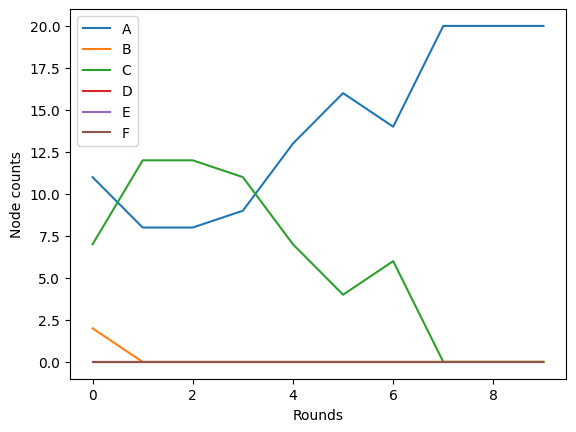

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

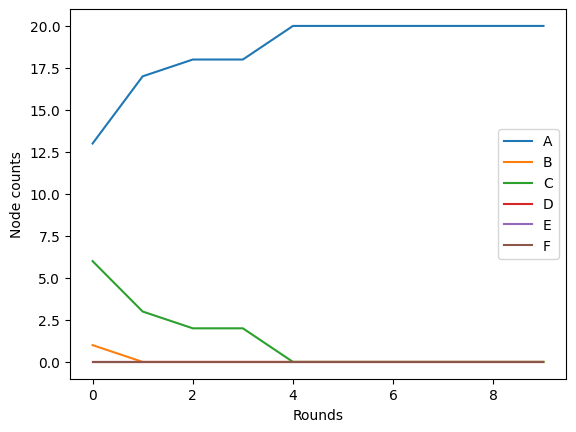

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

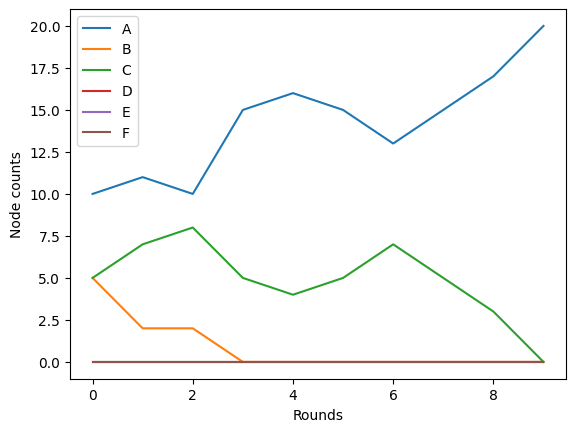

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

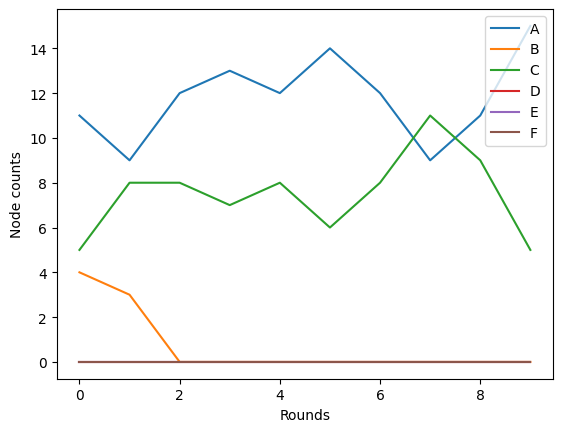

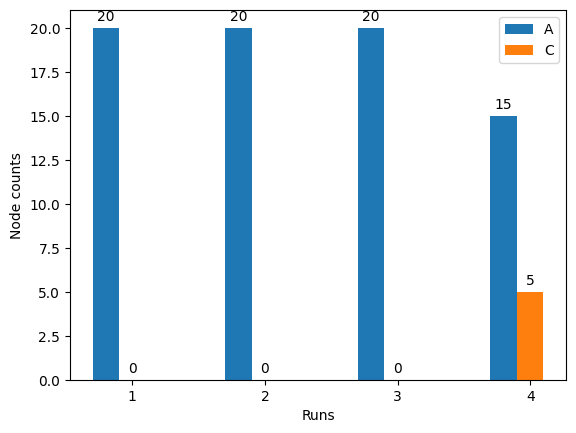

In [747]:
# Prepare the output folder
shutil.rmtree('./out')
os.mkdir('./out')

# Load the graph from a file
graph = nx.read_edgelist("./data/%s/graph.csv" % dataset, delimiter=" ")
positions = nx.spring_layout(graph, 2)

def reset_state():
    # Load the starting state from a file
    with open("./data/%s/state.csv" % dataset, 'r') as state:
        for key, value in csv.reader(state, delimiter=" "):
            graph.nodes[key]['current'] = value
            graph.nodes[key]['next'] = None
            graph.nodes[key]['freeze'] = 0

distributions = []

for i in range(1, runs + 1):
    reset_state()

    counts = run_simulation(i, graph)

    if counts is not None:
        distributions.append(counts)


distributions = pd.DataFrame(distributions)
distributions = distributions.replace(0,np.nan).dropna(axis=1,how="all")
distributions = distributions.replace(np.nan, 0).astype('int32')

# Export the over-run opinion distribution chart
figure, ax = plt.subplots()
group_width = 0.8
column_width = group_width / len(distributions)

x = np.arange(len(distributions))

for index, key in enumerate(distributions.keys()):
    rects1 = ax.bar(x - (group_width / 2) + (index * column_width) + 0.2, distributions[key], column_width, label=key)
    ax.bar_label(rects1, padding=3)

ax.set_xticks(x, x + 1)
ax.set_xlabel("Runs")
ax.set_ylabel("Node counts")
ax.legend()

figure.savefig("./out/distribution.pdf")